<a href="https://colab.research.google.com/github/ShamsuriIkhwan/plant-deep-learning/blob/main/alexnet_implementation_plant_health_monitoring_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip "/content/drive/path/input_file_name.zip" -d "/content/drive/path/output_folder/"
#!unzip "/content/drive/MyDrive/split_dataset_227.zip" -d "/content/drive/MyDrive/split_dataset_227"
#!unzip "/content/drive/MyDrive/split_dataset_224.zip" -d "/content/drive/MyDrive/split_dataset_224"

# Import **libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt


Path

In [3]:
train_dir='/content/drive/MyDrive/split_dataset_227/content/split_dataset_227/train'
valid_dir='/content/drive/MyDrive/split_dataset_227/content/split_dataset_227/valid'
test_dir='/content/drive/MyDrive/split_dataset_227/content/split_dataset_227/test'

# **Image preprocessing**

In [4]:
batch_size = 32
img_height,img_width = (227,227)
num_classes = 8
EPOCHS = 50

In [13]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [14]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed=1,
    class_mode='categorical',
    subset='training'
)

Found 6676 images belonging to 8 classes.


In [15]:
valid_generator = train_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 1269 images belonging to 8 classes.


In [16]:
test_generator = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 635 images belonging to 8 classes.


In [9]:
x, y = test_generator.next()
x.shape  # Display to confirm the shape of the input

(1, 227, 227, 3)

In [27]:
class_names = list(train_generator.class_indices.keys())
print(class_names)

['Durian_diseased', 'Durian_healthy', 'Guava_diseased', 'Guava_healthy', 'Mango_diseased', 'Mango_healthy', 'Rambutan_diseased', 'Rambutan_healthy']


In [28]:
target_names = ['Durian_diseased', 'Durian_healthy', 'Guava_diseased', 'Guava_healthy', 'Mango_diseased', 'Mango_healthy', 'Rambutan_diseased', 'Rambutan_healthy']

# Defining **alexnet** architecture

In [17]:
def AlexNet():
    input_layer = Input(shape=train_generator.image_shape)

    # First convolutional layer
    X = Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu', padding="same")(input_layer)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=2)(X)

    # Second convolutional layer
    X = Conv2D(filters=256, kernel_size=(5, 5), activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=2)(X)

    # Third convolutional layer
    X = Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation='relu', padding="same")(X)
    X = BatchNormalization()(X)

    # Fourth convolutional layer
    X = Conv2D(filters=384, kernel_size=(3, 3), strides=1, activation='relu', padding="same")(X)
    X = BatchNormalization()(X)

    # Fifth convolutional layer
    X = Conv2D(filters=256, kernel_size=(3, 3), strides=1, activation='relu', padding="same")(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=2)(X)

    # Flattening
    X = Flatten()(X)

    # First fully connected layer
    X = Dense(4096, activation='relu')(X)
    X = Dropout(0.5)(X)

    # Second fully connected layer
    X = Dense(4096, activation='relu')(X)
    X = Dropout(0.5)(X)

    # Output layer
    predictions = Dense(train_generator.num_classes, activation='softmax')(X)

    # Create the model
    model = Model(inputs=input_layer, outputs=predictions, name="AlexNet")
    return model


In [18]:
model = AlexNet()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024

In [19]:
checkpoint_filepath = '/content/drive/MyDrive/Alexnet V2/50epoch.{epoch:02d}-{val_loss:.2f}.h5'

checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)

In [20]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=valid_generator,
    callbacks=[checkpoint]
)


Epoch 1/50
209/209 [==============================] - ETA: 0s - loss: 4.4071 - accuracy: 0.3375
Epoch 1: val_accuracy improved from -inf to 0.35146, saving model to /content/drive/MyDrive/Alexnet V2/50epoch.01-1.60.h5
209/209 [==============================] - 1754s 8s/step - loss: 4.4071 - accuracy: 0.3375 - val_loss: 1.6043 - val_accuracy: 0.3515
Epoch 2/50
209/209 [==============================] - ETA: 0s - loss: 1.6180 - accuracy: 0.4146
Epoch 2: val_accuracy improved from 0.35146 to 0.45942, saving model to /content/drive/MyDrive/Alexnet V2/50epoch.02-1.39.h5
209/209 [==============================] - 121s 581ms/step - loss: 1.6180 - accuracy: 0.4146 - val_loss: 1.3889 - val_accuracy: 0.4594
Epoch 3/50
209/209 [==============================] - ETA: 0s - loss: 1.7180 - accuracy: 0.4443
Epoch 3: val_accuracy did not improve from 0.45942
209/209 [==============================] - 116s 555ms/step - loss: 1.7180 - accuracy: 0.4443 - val_loss: 4.9592 - val_accuracy: 0.2262
Epoch 4/50


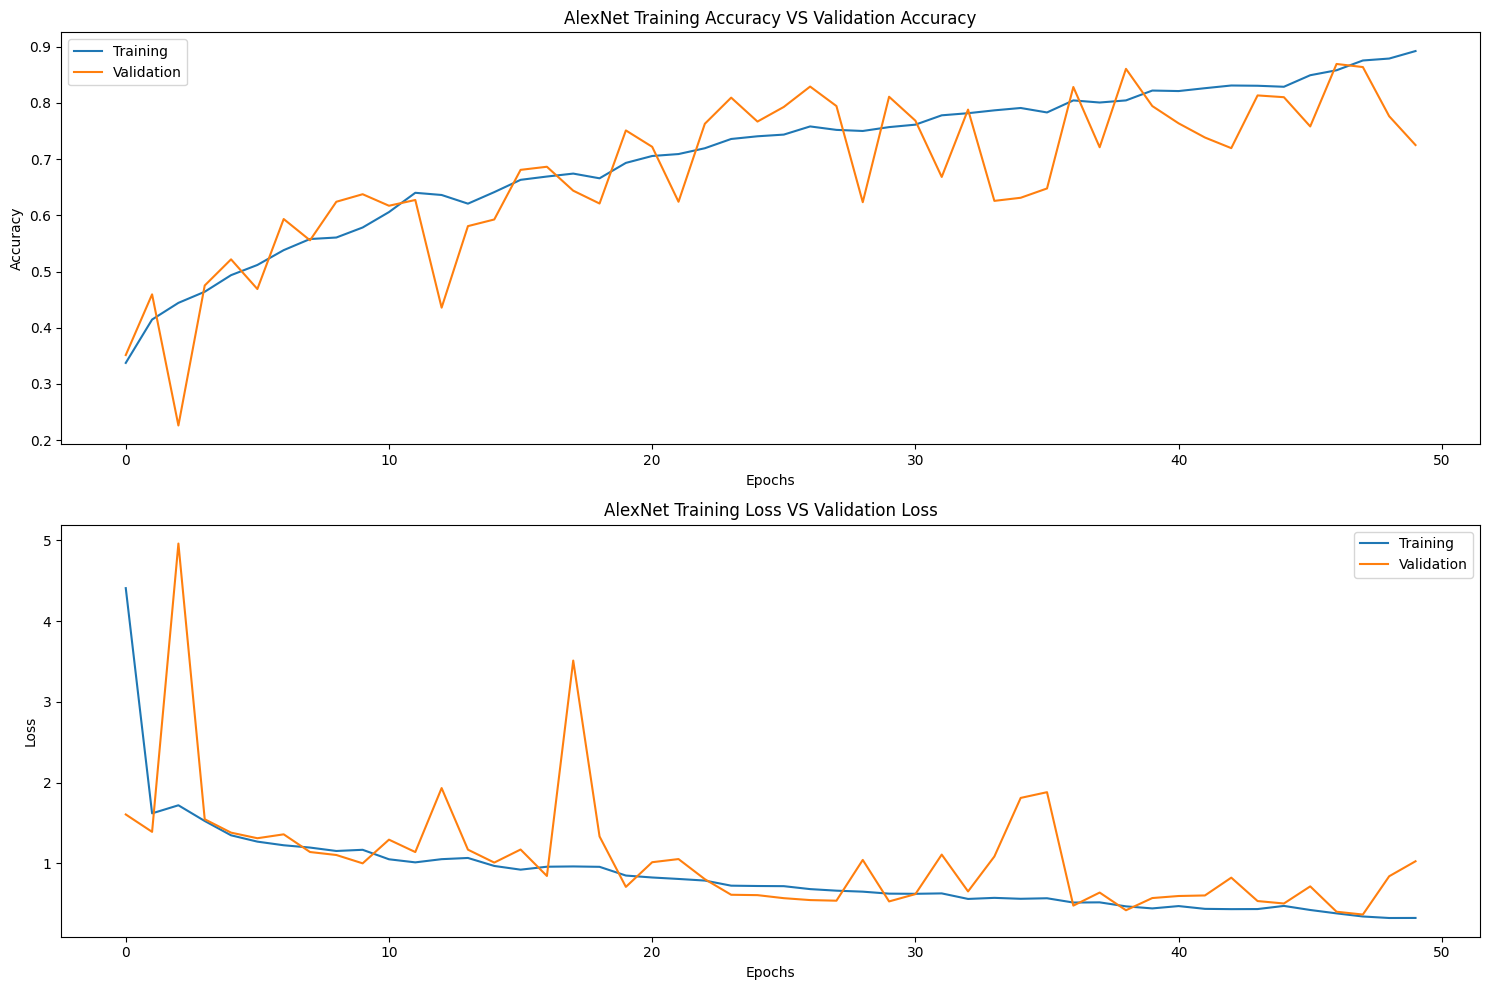

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Plot Training Accuracy and Validation Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('AlexNet Training Accuracy VS Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(['Training', 'Validation'])

# Plot Training Loss and Validation Loss
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('AlexNet Training Loss VS Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(['Training', 'Validation'])

plt.tight_layout()
plt.show()


In [23]:
# Load the model from the checkpoint path
#new_model = tf.keras.models.load_model('Saved_Model/AlexNet/50epoch.43-0.10.h5')

# Save the selected model with a different name
#new_model.save('Saved_Model/AlexNet.h5')
import glob
# Loading the best model
saved_models_dir = '/content/drive/MyDrive/Alexnet V2/'
saved_model_files = glob.glob(os.path.join(saved_models_dir, '*.h5'))
saved_model_files.sort()
best_model_file = saved_model_files[-1]
best_model = tf.keras.models.load_model(best_model_file)

# Saving the best model with a different name
best_model.save('/content/drive/MyDrive/Alexnet V2/Saved_Model/Best_AlexNet.h5')

In [24]:
# Evaluating the best model on the validation set
test_loss, test_acc = best_model.evaluate(valid_generator, verbose = 2)
print('\nVal_accuracy: ', test_acc)
print('\nVal_loss: ', test_loss)

1269/1269 - 21s - loss: 0.3985 - accuracy: 0.8716 - 21s/epoch - 16ms/step

Val_accuracy:  0.8715524077415466

Val_loss:  0.39853787422180176


1/1 [==============================] - 0s 21ms/step


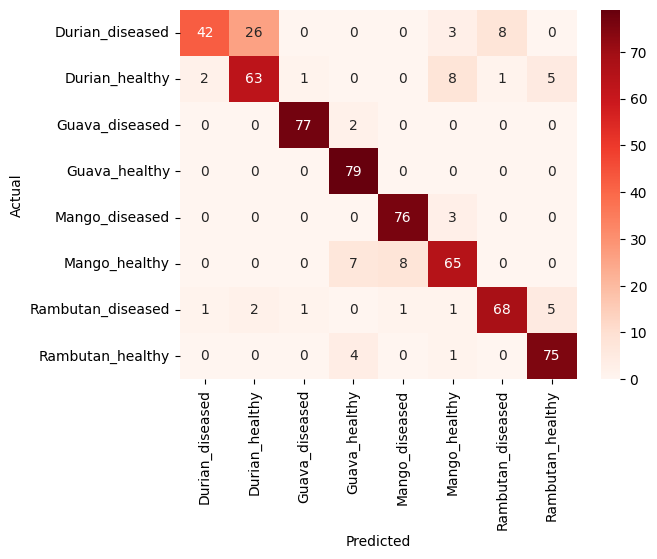

Test accuracy: 85.83%


In [25]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Alexnet V2/Saved_Model/Best_AlexNet.h5')

filenames = test_generator.filenames
nb_samples = len(test_generator)

y_prob = []
y_act = []

test_generator.reset()
for _ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Reds', annot=True, fmt='d')
plt.show()

accuracy = np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100
print('Test accuracy: {:.2f}%'.format(accuracy))


In [35]:
import imageio
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from PIL import Image

def run(source = None):
    model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Alexnet V2/Saved_Model/Best_AlexNet.h5')
    img = imageio.imread(source)
    img = Image.fromarray(img).resize((227, 227))
    x = img_to_array(img)
    x = np.expand_dims(img, axis=0)
    x = x/255
    prediction = model.predict(x)
    print("Predicted Image is:",target_names[np.argmax(prediction)])
run(source='/content/drive/MyDrive/split_dataset_227/content/split_dataset_227/test/Guava_healthy/Guava_healthy (14).jpg')

<ipython-input-35-e4a0e9811c95>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(source)


1/1 [==============================] - 0s 185ms/step
Predicted Image is: Guava_healthy


1/1 [==============================] - 0s 28ms/step


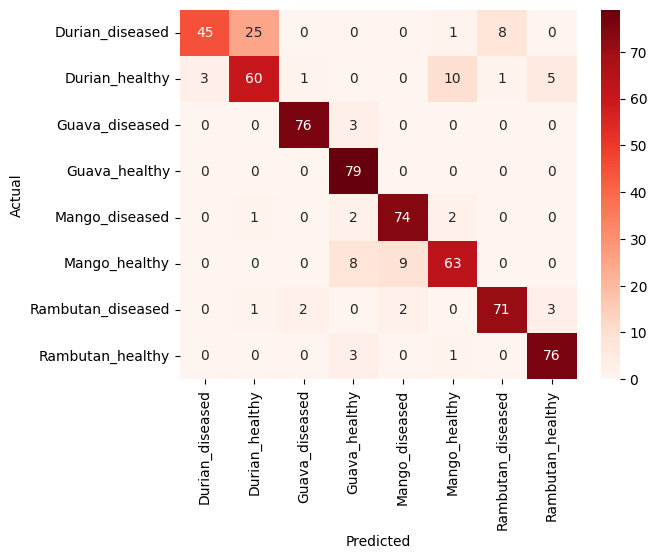

                   precision    recall  f1-score   support

  Durian_diseased       0.94      0.57      0.71        79
   Durian_healthy       0.69      0.75      0.72        80
   Guava_diseased       0.96      0.96      0.96        79
    Guava_healthy       0.83      1.00      0.91        79
   Mango_diseased       0.87      0.94      0.90        79
    Mango_healthy       0.82      0.79      0.80        80
Rambutan_diseased       0.89      0.90      0.89        79
 Rambutan_healthy       0.90      0.95      0.93        80

         accuracy                           0.86       635
        macro avg       0.86      0.86      0.85       635
     weighted avg       0.86      0.86      0.85       635



In [29]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

model = tf.keras.models.load_model('/content/drive/MyDrive/Alexnet V2/Saved_Model/Best_AlexNet.h5')

filenames = test_generator.filenames
nb_samples = len(test_generator)

y_prob = []
y_act = []

test_generator.reset()
for _ in range(nb_samples):
    X_test, Y_test = test_generator.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, cmap='Reds', annot=True, fmt='d')
plt.show()

# Generate classification report
classification_rep = classification_report(out_df['actual_class'], out_df['predicted_class'], target_names=target_names)

print(classification_rep)
